# 1.
## 高斯消元法解线性方程组

In [132]:
import numpy as np

A = np.array([[0.05, 0.07, 0.06, 0.05, 0.23], [0.07, 0.10, 0.08, 0.07, 0.32],
              [0.06, 0.08, 0.10, 0.09, 0.33], [0.05, 0.07, 0.09, 0.10, 0.31]])


def GEM(A):
    '''
    return solution x of A[:, :-1] * x = A[:, -1] through Gauss Elimination Method
    '''
    n = len(A)
    # A是增广矩阵

    for i in range(n):
        if i == 0: A[i] = A[i] / A[i, i]
        else:
            assert A[i - 1, i - 1] == 1
            for j in range(i):
                A[i] = A[i] - A[j] * A[i, j]
                A[i] = A[i] / A[i, i]
    # 将上三角增广矩阵通过初等变换转化为对角矩阵
    for i in range(n - 2, -1, -1):
        for j in range(n - 1, i, -1):
            A[i] = A[i] - A[j] * A[i, j]
    return A[:, n]


print('对增广矩阵：\n', A, '\n 通过高斯消元法求解，结果如下：')
print('\n 方程解为：\n', GEM(A))

对增广矩阵：
 [[0.05 0.07 0.06 0.05 0.23]
 [0.07 0.1  0.08 0.07 0.32]
 [0.06 0.08 0.1  0.09 0.33]
 [0.05 0.07 0.09 0.1  0.31]] 
 通过高斯消元法求解，结果如下：

 方程解为：
 [1. 1. 1. 1.]


## Cholesky 方法解线性方程组

In [133]:
import numpy as np

A = np.array([[0.05, 0.07, 0.06, 0.05, 0.23], [0.07, 0.10, 0.08, 0.07, 0.32],
              [0.06, 0.08, 0.10, 0.09, 0.33], [0.05, 0.07, 0.09, 0.10, 0.31]])

def Cholesky(A):
    '''
    return solution x of A[:,:-1] * x = A[:,-1] through Cholesky decomposition
    '''
    # cholesky decomposition
    n = len(A)
    H = A[:, :-1]
    b = A[:, -1]
    # H是系数矩阵，b是常数项矩阵
    for j in range(1, n + 1):
        for k in range(1, j):
            H[j - 1, j - 1] -= H[j - 1, k - 1]**2
        H[j - 1, j - 1] = H[j - 1, j - 1]**(1 / 2)
        for i in range(j + 1, n + 1):
            for k in range(1, j):
                H[i - 1, j - 1] -= H[i - 1, k - 1] * H[j - 1, k - 1]
            H[i - 1, j - 1] = H[i - 1, j - 1] / H[j - 1, j - 1]
    for i in range(n):
        for j in range(i + 1, n):
            H[i, j] = 0

    # 此时 H 是一个下三角矩阵
    print("\n 分解所得上三角矩阵为：\n", H.T)
    L = H
    # 求 L y = b
    L = np.concatenate((H, np.ones((n, 1))), axis=1)
    for i in range(n):
        L[i][n] = b[i]
    for i in range(n):
        if i == 0: L[i] = L[i] / L[i, i]
        else:
            assert L[i - 1, i - 1] == 1
            for j in range(i):
                L[i] = L[i] - L[j] * L[i, j]
                L[i] = L[i] / L[i, i]
    y = L[:, n]

    # 下面求 H.T x = y
    Lt = H.T
    Lt = np.concatenate((Lt, np.ones((n, 1))), axis=1)
    for i in range(n):
        Lt[i][n] = y[i]
    for i in range(n):
        Lt[i] = Lt[i] / Lt[i, i]
    for i in range(n - 2, -1, -1):
        for j in range(n - 1, i, -1):
            Lt[i] = Lt[i] - Lt[j] * Lt[i, j]

    return Lt[:, n]

print('对增广矩阵：\n', A ,'\n 通过Cholesky方法求解，结果如下：')
print('\n 方程解为：', Cholesky(A))

对增广矩阵：
 [[0.05 0.07 0.06 0.05 0.23]
 [0.07 0.1  0.08 0.07 0.32]
 [0.06 0.08 0.1  0.09 0.33]
 [0.05 0.07 0.09 0.1  0.31]] 
 通过Cholesky方法求解，结果如下：

 分解所得上三角矩阵为：
 [[ 2.23606798e-01  3.13049517e-01  2.68328157e-01  2.23606798e-01]
 [ 0.00000000e+00  4.47213595e-02 -8.94427191e-02 -3.10316769e-16]
 [ 0.00000000e+00  0.00000000e+00  1.41421356e-01  2.12132034e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.07106781e-02]]

 方程解为： [1. 1. 1. 1.]


# 2.对$f(x)=cos(x^2)$进行三次条样插值
## (a) 边界条件为$x_0 = 0$和$x_2 = 0.9$处二次导数值为0

首先编写代码来进行后续验算，解析部分在代码之后。

In [134]:
import math
import numpy as np

def h(j: int, x = [0, 0.6, 0.9]):
    return x[j + 1] - x[j]


def mu_(j: int):
    return h(j - 1) / (h(j - 1) + h(j))


def lambda_(j: int):
    return h(j) / (h(j - 1) + h(j))


def d(j: int, y: list):
    return 6 * (y[j - 1] / (h(j - 1) * (h(j - 1) + h(j))) + y[j + 1] /
              (h(j) * (h(j - 1) + h(j))) - y[j] / (h(j - 1) * h(j)))


def get_matrix(y):
    # n-1个方程组成的三对角矩阵
    n = len(y) - 1
    # A是增广矩阵
    A = np.zeros((n + 1,n + 2))
    for j in range(1,n):
        A[j-1][j-1] = mu_(j)
        A[j-1][j] = 2
        A[j-1][j+1] = lambda_(j)
        A[j-1,-1] = d(j,y)
    return A

In [135]:
def add_boundary(A, y):
    n = len(y) - 1
    A[n - 1][0] = 1
    A[n][2] = 1
    return A

def matrix(y):
    return add_boundary(get_matrix(y),y)


y = [math.cos(0), math.cos(0.36), math.cos(0.81)]

matr = matrix(y)
print(matr)
M = np.linalg.solve(matr[:, :-1], matr[:, -1])
print(M)

[[ 0.66666667  2.          0.33333333 -4.76326228]
 [ 1.          0.          0.          0.        ]
 [ 0.          0.          1.          0.        ]]
[ 0.         -2.38163114  0.        ]


In [136]:
def A(j):
    return (y[j + 1] - y[j]) / h(j) - h(j) / 6 * (M[j + 1] - M[j])


def B(j):
    return y[j] - M[j] * h(j)**2 / 6


print('A0=', A(0), ', A1=', A(1))
print('B0=', B(0), ',B1=', B(1))
print(M[1])
print(M[1] / (6 * h(0)))
print(M[1] / (6 * h(1)))


A0= 0.13132448675784164 , A1= -0.9404095260679346
B0= 1.0 ,B1= 0.9716212907721273
-2.3816311396128365
-0.6615642054480102
-1.32312841089602


接下来解析地计算插值后得到的f(x).

n=2,首先我们从一阶导连续的条件得到：
$$
\mu_j M_{j-1}+2M_j+\lambda_j M_{j+1}=d_j\quad   ,j=1
$$
代入数据得：
$$
2M_j=-4.76326228
$$
$$
M_j=-2.38163114\quad,j=1\\
\therefore S(x)
=\begin{cases}
    -0.6615642\cdot x^3+0.1313244\cdot x+ 1& 0\leq x\leq 0.6\\
    1.3231284\cdot (x-0.9)^3-0.9404095\cdot (x-0.6)+ 0.9716213 & 0.6\leq x\leq 0.9\\
\end{cases}
$$


## (b) 利用$f(x)=\cos(x^2)$得到$x_0=0$和$x_2=0.9$端点处的一次导数值。

$$f'(x)=-2x\sin(x^2)$$
因而，边界条件为：
$$f'(0)=0,\quad f'(0.9)=-1.8\cdot\sin(0.81)$$
$$
S'(x_0)=-\frac{M_0}{2}h_0+A_0=0\\
S'(x_2)=\frac{M_2}{2}h_1+A_1=-1.8\cdot\sin(0.81)\\
$$
同时，由异界导连续条件有：
$$
\mu_1 M_{0}+2M_1+\lambda_1 M_{2}=d_1
$$
其中：
$$
h_0=0.6,\quad h_1=0.3,\\
A_0=\frac{\cos(0.6^2)-\cos(0)}{0.6}-\frac{0.6}{6}(M_1-M_0),\\ A_1=\frac{\cos(0.9^2)-\cos(0.6^2)}{0.3}-\frac{0.3}{6}(M_2-M_1)
$$
因而$M_0,M_1,M_2$满足的线性方程组为：
$$
\begin{cases}
    -0.2M_0-0.1M_1=\frac{1-\cos(0.36)}{0.6}=0.10683862\\
    0.05M_1+0.1M_2=-1.8\sin(0.81)-\frac{\cos(0.81)-\cos(0.36)}{0.3}=-0.48238894\\
    \frac{2}{3}M_0+2M_1+\frac{1}{3}M_2=6\cdot(\frac{1}{0.54}+\frac{\cos(0.81)}{0.27}-\frac{\cos(0.36)}{0.18})=-4.76326228
\end{cases}
$$
上述线性方程组的解为：
$$
\begin{cases}
M_0=0.39886365\\
M_1=-1.86611358\\
M_2=-3.89083266\\
\end{cases}
$$
代回$A,B$表达式可知：
$$
A_0=0.11965910\\
A_1=-0.72009202\\
B_0=0.97606818\\
B_1=0.96388853\\
$$

$$
\therefore S(x)=
\begin{cases}
-0.1107955(x-0.6)^3-0.5183649x^3+0.1196591x+0.9760682\quad x\in [0,0.6]\\
1.0367297(x-0.9)^3-2.1615737(x-0.6)^3-0.7200920(x-0.6)+0.96388853\quad x\in [0.6,0.9]
\end{cases}
$$

# 3. Chebyshev 多项式展开$\log_2(x)$

In [137]:
import math
import numpy as np

start = 1
end = 2
step = 0.1

def f(x):
    return np.log2(1/2*x+1.5)


def T(m, x):
    if m == 0: return 1
    elif m == 1: return x
    else: return 2 * x * T(m - 1, x) - T(m - 2, x)


def delta(x, y):
    if x == y: return 1
    else: return 0


def c(N, m):
    return (2 - delta(0, m)) / N * np.sum([
        math.cos((m * math.pi *
                  (k + 0.5)) / N) * f(math.cos(math.pi * (k + 0.5) / N))
        for k in range(N)
    ])


def S(x, N):
    return np.sum([c(N, m) * T(m, x) for m in range(N)])

def transform_S(x,a,b,N):
    return S(2 * (x-a)/(b-a)-1,N)


[2.4434387201012874e-06, 0.1375030585551525, 0.2630364531047573, 0.3785111194246006, 0.4854250201836586, 0.5849625007211564, 0.6780735120398902, 0.7655351444545313, 0.847995471894916, 0.9259997068643171]
[0.0, 0.13750352374993502, 0.26303440583379406, 0.3785116232537301, 0.4854268271702421, 0.5849625007211566, 0.6780719051126382, 0.7655347463629776, 0.8479969065549506, 0.9259994185562238]


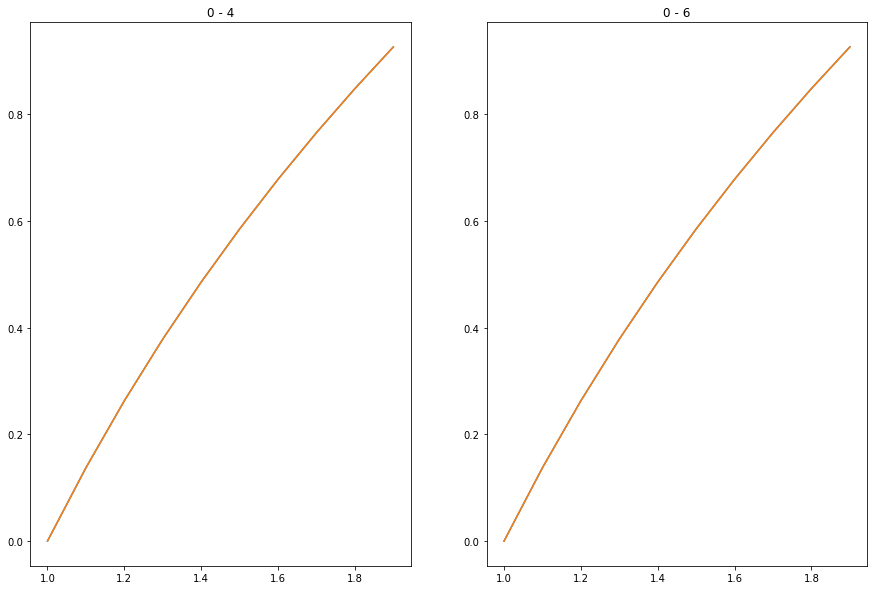

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i,N in enumerate([5,7]):
    plt.subplot(121+i)
    xs = []
    ys = []
    y_expected = []
    x = start
    while x <= end:
        xs.append(x)
        ys.append(transform_S(x,1,2,N))
        y_expected.append(np.log2(x))
        x += step

    plt.plot(xs, ys)
    plt.plot(xs, y_expected)
    plt.title('0 - ' + str(N-1))

print(ys)
print(y_expected)
    
plt.show()


接下来对误差进行作图。

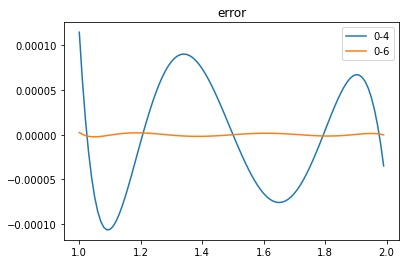

In [150]:
from cProfile import label
import matplotlib.pyplot as plt

start = 1
end = 2
step = 0.01


for i, N in enumerate([5, 7]):
    xs = []
    ys = []
    y_expected = []
    delta_y = []
    x = start
    while x <= end:
        xs.append(x)
        ys.append(transform_S(x, 1, 2, N))
        y_expected.append(np.log2(x))
        delta_y.append((transform_S(x, 1, 2, N) - np.log2(x)))
        x += step

    plt.plot(xs, delta_y,label='0-'+str(N-1))
    plt.title('error')
    plt.legend()


plt.show()


从上图可以看出随展开阶数从0-4升高到0-6，误差明显减小，减少约两个数量级。

且误差呈现震荡形式。

# 4. Runge效应
## a. 拉格朗日内插

In [107]:
import numpy as np
n = 20
xlist = np.arange(-1,1.1,0.1)

def f(x):
    return 1/(1 + 25 * x ** 2)

def L(j,x):
    return np.prod([(x - xlist[m])/(xlist[j]-xlist[m]) for m in np.delete(range(n+1),j)])

def P(n,x):
    return np.sum([f(xlist[i])*L(i,x) for i in range(n+1)])

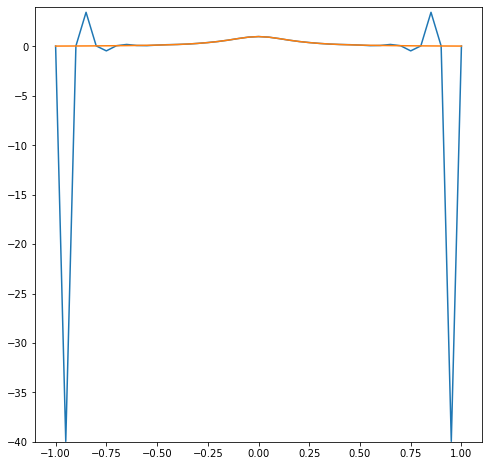

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))


xl = []
yl = []
y_expected = []
delta_y = []

for x in np.arange(-1,1.05,0.05):
    xl.append(x)
    yl.append(P(n,x))
    y_expected.append(f(x))
    delta_y.append(abs(f(x)-P(n,x)))

plt.ylim(-40,4)
plt.plot(xl, yl)
plt.plot(xl, y_expected)


plt.show()

In [110]:
import pandas as pd

df = pd.DataFrame(columns=['x', 'f(x)','P(x)','delta_y'])

for i in range(len(xl)):
    df = df.append({'x':'{:.2f}'.format(xl[i]), 'f(x)': y_expected[i],'P(x)':yl[i],'delta_y':'{:.1e}'.format(delta_y[i])}, ignore_index=True)


df

,x,f(x),P(x),delta_y
0,-1.00,0.038462,0.038462,0.0e+00
1,-0.95,0.042440,-39.952449,4.0e+01
2,-0.90,0.047059,0.047059,3.7e-14
3,-0.85,0.052459,3.454958,3.4e+00
4,-0.80,0.058824,0.058824,8.7e-15
5,-0.75,0.066390,-0.447052,5.1e-01
6,-0.70,0.075472,0.075472,2.4e-15
7,-0.65,0.086486,0.202423,1.2e-01
8,-0.60,0.100000,0.100000,8.7e-16
9,-0.55,0.116788,0.080660,3.6e-02


## (b) chebyshev

In [111]:
import math
import numpy as np

start = -1
end = 1
step = 0.05


def f(x):
    return 1 / (1 + 25 * x**2)


def T(m, x):
    if m == 0: return 1
    elif m == 1: return x
    else: return 2 * x * T(m - 1, x) - T(m - 2, x)


def delta(x, y):
    if x == y: return 1
    else: return 0


def c(N, m):
    return (2 - delta(0, m)) / N * np.sum([
        math.cos((m * math.pi *
                  (k + 0.5)) / N) * f(math.cos(math.pi * (k + 0.5) / N))
        for k in range(N)
    ])


def S(x, N):
    return np.sum([c(N, m) * T(m, x) for m in range(N)])


def transform_S(x, a, b, N):
    return S(2 * (x - a) / (b - a) - 1, N)


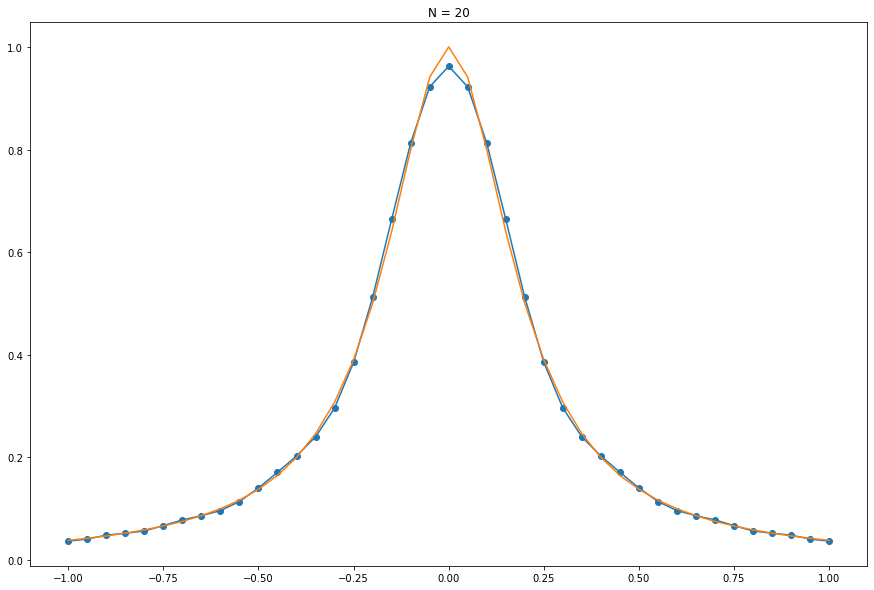

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

N = 20

xs = []
ys = []
y_expected = []
delta_y = []
x = start
while x <= end:
    x = round(x,2)
    xs.append(x)
    ys.append(transform_S(x, -1, 1, N))
    y_expected.append(f(x))
    delta_y.append(abs(ys[-1] - y_expected[-1]))
    x += step

plt.plot(xs, ys)
plt.scatter(xs, ys)
plt.plot(xs, y_expected)
plt.title('N = ' + str(N))

plt.show()


In [114]:
import pandas as pd

df = pd.DataFrame(columns=['x', 'f(x)', 'S(x)', 'delta_y'])

for i in range(len(xl)):
    df = df.append(
        {
            'x': '{:.2f}'.format(xs[i]),
            'f(x)': y_expected[i],
            'S(x)': ys[i],
            'delta_y': delta_y[i]
        },
        ignore_index=True)

df.style.hide_index()

df


,x,f(x),S(x),delta_y
0,-1.00,0.038462,0.037016,0.001446
1,-0.95,0.042440,0.040849,0.001592
2,-0.90,0.047059,0.048685,0.001626
3,-0.85,0.052459,0.052261,0.000198
4,-0.80,0.058824,0.056713,0.002110
5,-0.75,0.066390,0.067169,0.000779
6,-0.70,0.075472,0.078252,0.002780
7,-0.65,0.086486,0.086534,0.000047
8,-0.60,0.100000,0.096413,0.003587
9,-0.55,0.116788,0.114126,0.002663


## c. 三次条样函数内插

In [115]:
import math
import numpy as np

def h(j: int, x = [x for x in np.arange(-1, 1.1, 0.1)]):
    return x[j + 1] - x[j]


def mu_(j: int):
    return h(j - 1) / (h(j - 1) + h(j))


def lambda_(j: int):
    return h(j) / (h(j - 1) + h(j))


def d(j: int, y: list):
    return 6 * (y[j - 1] / (h(j - 1) * (h(j - 1) + h(j))) + y[j + 1] /
                (h(j) * (h(j - 1) + h(j))) - y[j] / (h(j - 1) * h(j)))


def get_matrix(y):
    # n-1个方程组成的三对角矩阵
    n = len(y) - 1
    # A是增广矩阵
    A = np.zeros((n + 1, n + 2))
    for j in range(1, n):
        A[j - 1][j - 1] = mu_(j)
        A[j - 1][j] = 2
        A[j - 1][j + 1] = lambda_(j)
        A[j - 1, -1] = d(j, y)
    return A


def add_boundary(A, y):
    n = len(y) - 1
    # 1处二阶导
    A[n - 1][-2] = 1
    A[n - 1][-1] = -925 / 4394
    # -1处二阶导
    A[n][0] = 1
    A[n][-1] = 925 / 4394
    return A


def matrix(y):
    return add_boundary(get_matrix(y), y)


def f(x):
    return 1 / (1 + 25 * x**2)


xlist = [round(x,2) for x in np.arange(-1, 1.1, 0.1)]
ylist = [f(x) for x in xlist]
L = matrix(ylist)

def process(L):
    M0 = L[-1][-1]
    Mn = L[-2][-1]
    L = np.concatenate((L[0:-2, 1:-2], L[0:-2, -1].reshape(-1,1)), axis=1)
    L[:,-1][0] -= 0.5 * M0
    L[:,-1][-1]-= 0.5 * Mn
    return L,M0,Mn

L,M0,Mn = process(L)
M = np.concatenate(([M0],GEM(L),[Mn]))
print(M)

[  0.21051434   0.30513616   0.46939351   0.7473675    1.26921641
   2.21740642   4.34391653   7.78093278  15.30158313  -4.3718807
 -57.81406035  -4.37187791  15.301572     7.78097451   4.34376071
   2.21798795   1.2670461    0.7554672    0.43916501   0.41795045
  -0.21051434]


In [116]:
def S(x, M, xlist=xlist):

    def A(j):
        return (ylist[j + 1] - ylist[j]) / h(j) - h(j) / 6 * (M[j + 1] - M[j])

    def B(j):
        return ylist[j] - M[j] * h(j)**2 / 6

    # 确定x落在哪个区间
    for i, xi in enumerate(xlist):
        if i == len(xlist) - 1:
            j = len(xlist) - 1
            break
        else:
            if x >= round(xi, 1) and x <= round(xlist[i+1],1):
                j = i
                break
    return -M[j] / (6 * h(j)) * (x - xlist[j + 1])**3 + M[j + 1] / (6 * h(j)) * (x - xlist[j])**3 + A(j) * (x - xlist[j]) + B(j)


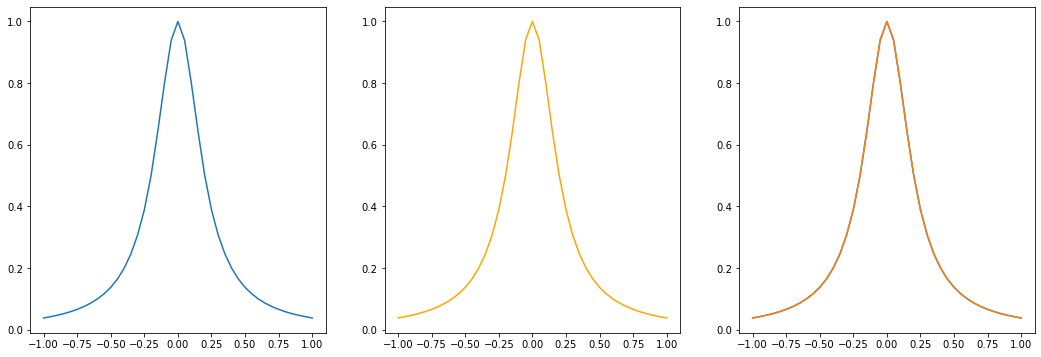

In [117]:
xl = []
yl = []
y_expected = []
delta_y = []

for x in [round(x, 2) for x in np.arange(-1, 1.05, 0.05)]:
    xl.append(x)
    yl.append(S(x, M))
    y_expected.append(f(x))
    delta_y.append(abs(f(x) - S(x, M)))

plt.figure(figsize=(18,6))

plt.subplot(131)
plt.plot(xl, yl)

plt.subplot(132)
plt.plot(xl, y_expected, color='orange')

plt.subplot(133)
plt.plot(xl, yl)
plt.plot(xl, y_expected)

plt.show()

In [119]:
import pandas as pd

df = pd.DataFrame(columns=['x', 'f(x)', 'P(x)', 'delta_y'])

for i in range(len(xl)):
    df = df.append(
        {
            'x': '{:.2f}'.format(xl[i]),
            'f(x)': y_expected[i],
            'P(x)': yl[i],
            'delta_y': '{:.2e}'.format(delta_y[i])
        },
        ignore_index=True)

df.round({'x': 2})
df.style.hide_index()

df

,x,f(x),P(x),delta_y
0,-1.00,0.038462,0.038462,0.00e+00
1,-0.95,0.042440,0.042438,2.42e-06
2,-0.90,0.047059,0.047059,0.00e+00
3,-0.85,0.052459,0.052457,1.92e-06
4,-0.80,0.058824,0.058824,0.00e+00
5,-0.75,0.066390,0.066387,2.90e-06
6,-0.70,0.075472,0.075472,2.78e-17
7,-0.65,0.086486,0.086475,1.10e-05
8,-0.60,0.100000,0.100000,0.00e+00
9,-0.55,0.116788,0.116786,1.94e-06


# 5. 样条函数在计算机绘图中的运用

## a.

In [124]:
xt = [(1 - math.cos(t * math.pi / 4)) * math.cos(t * math.pi / 4)
      for t in range(9)]
yt = [(1 - math.cos(t * math.pi / 4)) * math.sin(t * math.pi / 4)
      for t in range(9)]
tl = [t for t in range(9)]
for i in range(9):
    print('%-10s%-35s%-35s' %
          ('t = ' + str(i), 'x_t =' + str(xt[i]), 'y_t = ' + str(yt[i])))


t = 0     x_t =0.0                           y_t = 0.0                          
t = 1     x_t =0.20710678118654752           y_t = 0.20710678118654752          
t = 2     x_t =6.123233995736765e-17         y_t = 0.9999999999999999           
t = 3     x_t =-1.2071067811865475           y_t = 1.2071067811865475           
t = 4     x_t =-2.0                          y_t = 2.4492935982947064e-16       
t = 5     x_t =-1.207106781186548            y_t = -1.2071067811865475          
t = 6     x_t =-1.8369701987210302e-16       y_t = -1.0000000000000002          
t = 7     x_t =0.2071067811865476            y_t = -0.20710678118654768         
t = 8     x_t =0.0                           y_t = -0.0                         


## b. 给出样条函数

下面给出用以生成$S_{\Delta}(X;t)$的代码以及函数图像。

In [125]:
# 此处的三次条样函数S(X,t)
import math
import numpy as np
import matplotlib.pyplot as plt

def h(j: int, x=[t for t in range(9)]):
    return x[j + 1] - x[j]


def mu_(j: int):
    return h(j - 1) / (h(j - 1) + h(j))


def lambda_(j: int):
    return h(j) / (h(j - 1) + h(j))


def d(j: int, y: list):
    return 6 * (y[j - 1] / (h(j - 1) * (h(j - 1) + h(j))) + y[j + 1] /
                (h(j) * (h(j - 1) + h(j))) - y[j] / (h(j - 1) * h(j)))


def get_matrix(y):
    # n-1个方程组成的三对角矩阵
    n = len(y) - 1
    # A是增广矩阵
    A = np.zeros((n + 1, n + 2))
    for j in range(1, n):
        A[j - 1][j - 1] = mu_(j)
        A[j - 1][j] = 2
        A[j - 1][j + 1] = lambda_(j)
        A[j - 1, -1] = d(j, y)
    return A


def add_boundary(A, y):
    n = len(y) - 1
    # 0处二阶导
    A[n - 1][0] = 1
    A[n][-1] = math.pi**2 / 16
    # 8处二阶导
    A[n][-2] = 1
    A[n][-1] = math.pi**2 / 16
    return A


def matrix(y):
    return add_boundary(get_matrix(y), y)


def f(x):
    return (1 - math.cos(x * math.pi / 4)) * math.cos(x * math.pi / 4)


L = matrix(xt)
Mx = np.linalg.solve(L[:, :-1], L[:, -1])


def Sx(x, M=Mx, xlist=tl):
    def A(j):
        return (xt[j + 1] - xt[j]) / h(j) - h(j) / 6 * (M[j + 1] - M[j])

    def B(j):
        return xt[j] - M[j] * h(j)**2 / 6

    # 确定x落在哪个区间
    for i, xi in enumerate(xlist):
        if i == len(xlist) - 1:
            j = len(xlist) - 1
            break
        else:
            if x >= round(xi, 1) and x <= round(xlist[i + 1], 1):
                j = i
                break
    return -M[j] / (6 * h(j)) * (x - xlist[j + 1])**3 + M[j + 1] / (
        6 * h(j)) * (x - xlist[j])**3 + A(j) * (x - xlist[j]) + B(j)

In [126]:
# 这段代码说明在采样点S(x)=f(x)
xt_calculated = [Sx(t,Mx) for t in range(9)]
print(xt_calculated)
print(xt)

[0.0, 0.20710678118654752, 0.0, -1.2071067811865475, -1.9999999999999998, -1.207106781186548, -2.220446049250313e-16, 0.20710678118654763, 0.0]
[0.0, 0.20710678118654752, 6.123233995736765e-17, -1.2071067811865475, -2.0, -1.207106781186548, -1.8369701987210302e-16, 0.2071067811865476, 0.0]


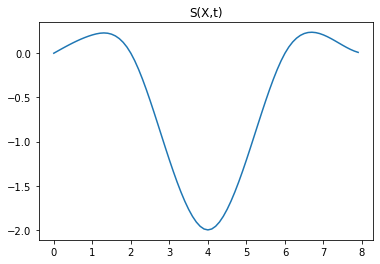

In [127]:
plt.plot([t for t in np.arange(0, 8, 0.1)],
         [Sx(t) for t in np.arange(0, 8, 0.1)])
plt.title('S(X,t)')
plt.show()

下面给出用以生成$S_{\Delta}(Y;t)$的代码以及函数图像。

In [128]:
# 此处的三次条样函数S(Y,t)
import math
import numpy as np


def h(j: int, x=[t for t in range(9)]):
    return x[j + 1] - x[j]


def mu_(j: int):
    return h(j - 1) / (h(j - 1) + h(j))


def lambda_(j: int):
    return h(j) / (h(j - 1) + h(j))


def d(j: int, y: list):
    return 6 * (y[j - 1] / (h(j - 1) * (h(j - 1) + h(j))) + y[j + 1] /
                (h(j) * (h(j - 1) + h(j))) - y[j] / (h(j - 1) * h(j)))


def get_matrix(y):
    # n-1个方程组成的三对角矩阵
    n = len(y) - 1
    # A是增广矩阵
    A = np.zeros((n + 1, n + 2))
    for j in range(1, n):
        A[j - 1][j - 1] = mu_(j)
        A[j - 1][j] = 2
        A[j - 1][j + 1] = lambda_(j)
        A[j - 1, -1] = d(j, y)
    return A


def add_boundary(A, y):
    n = len(y) - 1
    # 0处二阶导
    A[n - 1][0] = 1
    A[n][-1] = 0
    # 8处二阶导
    A[n][-2] = 1
    A[n][-1] = 0
    return A


def matrix(y):
    return add_boundary(get_matrix(y), y)


def f(x):
    return (1 - math.cos(x * math.pi / 4)) * math.sin(x * math.pi / 4)


L = matrix(yt)
My = np.linalg.solve(L[:, :-1], L[:, -1])


def Sy(x, M=My, xlist=tl):
    def A(j):
        return (yt[j + 1] - yt[j]) / h(j) - h(j) / 6 * (M[j + 1] - M[j])

    def B(j):
        return yt[j] - M[j] * h(j)**2 / 6

    # 确定x落在哪个区间
    for i, xi in enumerate(xlist):
        if i == len(xlist) - 1:
            j = len(xlist) - 1
            break
        else:
            if x >= round(xi, 1) and x <= round(xlist[i + 1], 1):
                j = i
                break
    return -M[j] / (6 * h(j)) * (x - xlist[j + 1])**3 + M[j + 1] / (
        6 * h(j)) * (x - xlist[j])**3 + A(j) * (x - xlist[j]) + B(j)

In [129]:
# 这段代码说明在采样点S(x)=f(x)
yt_calculated = [Sy(t, My) for t in range(9)]
print(yt_calculated)
print(yt)

[0.0, 0.20710678118654752, 0.9999999999999998, 1.2071067811865475, 2.220446049250313e-16, -1.2071067811865475, -1.0, -0.2071067811865478, 0.0]
[0.0, 0.20710678118654752, 0.9999999999999999, 1.2071067811865475, 2.4492935982947064e-16, -1.2071067811865475, -1.0000000000000002, -0.20710678118654768, -0.0]


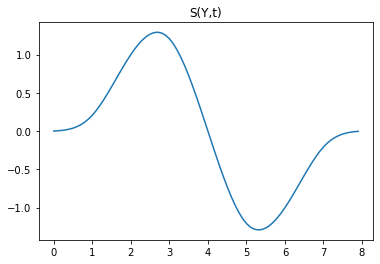

In [130]:
plt.plot([t for t in np.arange(0, 8, 0.1)],
         [Sy(t) for t in np.arange(0, 8, 0.1)])
plt.title('S(Y,t)')
plt.show()

## c. 画出曲线

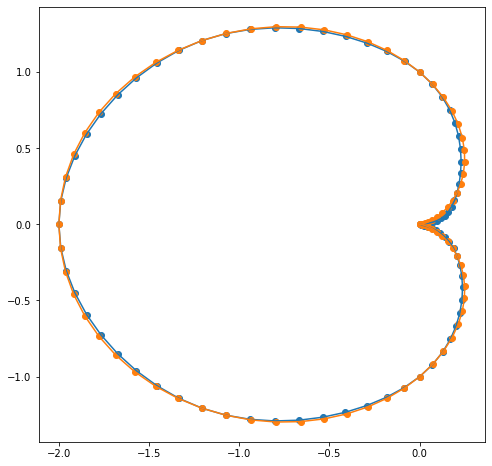

In [131]:
ts = np.arange(0, 8, 0.1)

xs = [Sx(t, Mx) for t in ts]
ys = [Sy(t, My) for t in ts]
xs2 = [(1 - math.cos(t * math.pi / 4)) * math.cos(t * math.pi / 4) for t in ts]
ys2 = [(1 - math.cos(t * math.pi / 4)) * math.sin(t * math.pi / 4) for t in ts]

plt.figure(figsize=(8, 8))
plt.plot(xs, ys)
plt.scatter(xs, ys)
plt.plot(xs2, ys2)
plt.scatter(xs2, ys2)
plt.show()

## d. 简要说明

因为三次样条函数算法对函数的模拟方式内涵了函数的一阶导与二阶导连续这两个条件，所以可以使得作出的函数平滑。